Inspired by a recent paper on how giving students cookies can influence course evaluations: https://onlinelibrary.wiley.com/doi/epdf/10.1111/medu.13627

I think there's an (easy to make) fundamental error in how they conver course evaluation scores scores into teacher scores and uncertainties

The main point is, teachers in the cookie class v no cookies got scores distributions of (sic) 113.4 +/- 4.9 versus 109.2 +/- 7.3. Those are mean and SD. 



In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
# Converting to mean and standard-deviation of the mean (aka standard error)
N_sample = 56  # For both groups
mean_1 = 113.4
sd_1 = 4.9
mean_2 = 109.2
sd_2 = 7.3

se_1 = sd_1 / np.sqrt(N_sample)
se_2 = sd_2 / np.sqrt(N_sample)



In [3]:
print(mean_1, se_1)
print(mean_2, se_2)

113.4 0.654790042685
109.2 0.97550353298


In [4]:
# So yes, those numbers look like they are significantly different. 


In [5]:
# Let's say this is the "truth" distribution if you evaluated a class thousands of times
parent_heights = np.array([0, 0, 510, 10, 10])*5000
temp = []
for i,val in enumerate(parent_heights):
    temp.extend([i+1]*val)
parent_dist = np.array(temp)

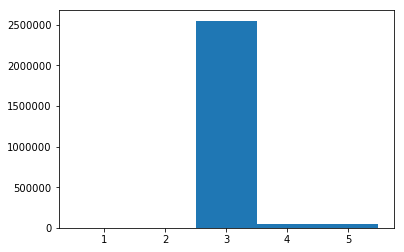

In [6]:
bins = np.arange(0.5, 6.5, 1.)
ack = plt.hist(parent_dist, bins=bins)

In [7]:
# Here's the "true" underlying mean and standard deviation of our population
print(np.mean(parent_dist), np.std(parent_dist))

3.05660377358 0.301886792453


In [8]:
# Let's draw a sample of 112 from this distribution, and put them in 2 groups
np.random.seed(69)
sub_sample = np.random.choice(parent_dist, 112)
class_1 = sub_sample[0:56]
class_2 = sub_sample[56:]

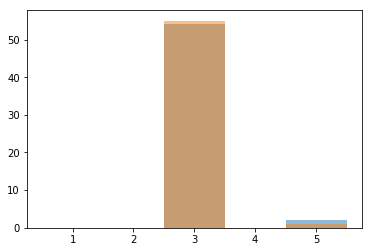

In [9]:
# let's take a look
ack = plt.hist(class_1, bins=bins, alpha=0.5)
ack = plt.hist(class_2, bins=bins, alpha=0.5)

In [10]:
print(np.mean(class_1), np.std(class_1))
print(np.mean(class_2), np.std(class_2))

3.07142857143 0.371153744479
3.03571428571 0.264864231682


In [11]:
se_1 = np.std(class_1)/np.sqrt(class_1.size)
se_2 = np.std(class_2)/np.sqrt(class_2.size)

print(np.mean(class_1), se_1)
print(np.mean(class_2), se_2)


3.07142857143 0.049597505345
3.03571428571 0.0353939717488


In [12]:
# What is the diff and uncert?
diff = np.mean(class_1) - np.mean(class_2)
uncert  = np.sqrt(se_1**2 + se_2**2)
print(diff, uncert)

0.0357142857143 0.0609314842474


In [13]:
se_1

0.049597505344958118

In [14]:
5/113.

0.04424778761061947

In [15]:
(mean_1-mean_2)/mean_1

0.03703703703703706

In [16]:
1./np.sqrt(112.)

0.094491118252306799

In [17]:
#----------------------------
# Let's do a more simple example
ratings = np.array([3,4,4, 4, 4,5])


In [18]:
np.mean(ratings), np.std(ratings), np.std(ratings)/np.sqrt(ratings.size)

(4.0, 0.57735026918962573, 0.23570226039551584)

In [19]:
# now to properly propigate the uncertainties
np.sqrt(np.sum(ratings**2))/ratings.size

# Here's what the uncertainty in the mean should be
#1./np.sqrt(ratings.size)

1.6499158227686108

In [20]:
np.mean(ratings)*1./np.sqrt(ratings.size)

1.6329931618554523

In [21]:
# So, I'm pretty sure the standard deviation of the poll values is irrelivant. 

# Unit wise, it's gotta be the mean and not the sqrt of the mean, right?
err_1 = mean_1/np.sqrt(N_sample)
err_2 = mean_2/np.sqrt(N_sample)
err_1, err_2

(15.153712416434464, 14.592463808418373)

In [22]:
### ah, for every survey that has a value of 1, that's 1 +/- sqrt(1). Every survey that has a score of 102, should be counted as 
# 102 +/- sqrt(102). 

# That way, the uncertainty in the mean is going to be mean * 1/sqrt(N).

In [23]:
8.4/np.sqrt(N_sample), 10.1/np.sqrt(N_sample)

(1.1224972160321824, 1.3496692716577432)

In [24]:
10.1-8.4, np.sqrt(8.4**2+10.1**2)/np.sqrt(N_sample)

(1.6999999999999993, 1.7554506950800819)

In [25]:
# I think I like the idea that if I sum the number of counts in a bin, the uncertainty has to be root-N, because
# Poisson Stats. That implies that the number of counts in each bin has an uncertainty of root-N.
#
bin_vals = np.array([1,2,3,4])
#bin_counts = np.array([0,1,2,1])
bin_counts = np.array([0,0,50,50])
bin_count_uncert = np.sqrt(bin_counts)

In [26]:
vals = bin_vals * bin_counts
vals_uncerts = bin_vals*bin_count_uncert

In [27]:
vals, vals_uncerts

(array([  0,   0, 150, 200]),
 array([  0.        ,   0.        ,  21.21320344,  28.28427125]))

In [28]:
mean = np.sum(vals)/np.sum(bin_counts)
mean_uncert = np.sqrt(np.sum(vals_uncerts**2))/np.sum(bin_counts)

In [29]:
mean, mean_uncert, mean*1./np.sqrt(np.sum(bin_counts))

(3.5, 0.35355339059327379, 0.34999999999999998)

In [30]:
#ok, this looks very reasonable now. Let's see if we scale to arbitrary bins
bin_vals = np.array([100,105,112,121])
#bin_counts = np.array([0,1,2,1])
bin_counts = np.array([1,1,1,1])
bin_count_uncert = np.sqrt(bin_counts)
vals = bin_vals * bin_counts
vals_uncerts = bin_vals*bin_count_uncert
mean = np.sum(vals)/np.sum(bin_counts)
mean_uncert = np.sqrt(np.sum(vals_uncerts**2))/np.sum(bin_counts)
mean, mean_uncert, mean*1./np.sqrt(np.sum(bin_counts))

(109.5, 54.891939298953538, 54.75)